# <font color='blue'>MTA Latin America Analysis for Systems:  Email</font>

Channel Content Syndication Deep Dive Focuses:

- <font color='blue'>Journey Length</font>
    - adsfads
- <font color='blue'>Journey Stage</font>
    - adsfads
- <font color='blue'>Client Flag</font>
    - adsfafd
- <font color='blue'>Client Type</font>
    - adfafd
- <font color='blue'>Industry</font>

In [1]:
import requests
import os
import sys
import pandas as pd
import pandasql as ps
import numpy as np
import pyodbc
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chisquare as cs
from scipy.stats import chi2_contingency

## Overall Latin America Average Marketing Attribution by OPTY_FLAG in 2018 for Channel Email

In [7]:
#EMAIL VISITS AND INTERACTIONS FOR OPTY FLAG

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_o = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
			OPTY_FLAG,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT','INTERACTION')
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
			AND PLAN='Systems'
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY 
				JOURNEY_ID,
				OPTY_FLAG; """, con=cnxn)

cnxn.close()
df_o.head(5)

,JOURNEY_ID,OPTY_FLAG,ACT_CT,AVG_ATTR
0,2758643.0,1.0,23,-0.002587
1,2868201.0,1.0,31,-0.016126
2,2874313.0,1.0,1,0.004664
3,2878711.0,1.0,9,-0.027819
4,2879694.0,1.0,7,0.002672


In [8]:
#EMAIL FOR OPTY FLAG:  SYSTEMS

df_o_sy = """
    
    SELECT 
        JOURNEY_ID,
        OPTY_FLAG,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_o
        
        GROUP BY
            JOURNEY_ID,
            OPTY_FLAG; """

df_o_s = (ps.sqldf(df_o_sy, locals()))
df_o_s.head(5)

,JOURNEY_ID,OPTY_FLAG,TOT_ACT,AVG_ACT,ATTR
0,151.0,0.0,2,2.0,0.000058
1,284.0,0.0,9,9.0,-0.000114
2,386.0,0.0,18,18.0,-0.000029
3,391.0,0.0,3,3.0,-0.000015
4,608.0,0.0,4,4.0,0.000203


In [9]:
#EMAIL FOR OPTY FLAG:  SYSTEMS

ttest_o_cat1 = df_o_s[df_o_s['OPTY_FLAG']==1]
ttest_o_cat2 = df_o_s[df_o_s['OPTY_FLAG']==0]

ttest_ind(ttest_o_cat1['AVG_ACT'], ttest_o_cat2['AVG_ACT'])

Ttest_indResult(statistic=-4.417032425519919, pvalue=1.0055272194428526e-05)

In [10]:
#EMAIL FOR OPTY_FLAG:  SYSTEMS

df_o_s2 = """
    
    SELECT 
        OPTY_FLAG,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_o_s
        
        GROUP BY 
            OPTY_FLAG; """

df_o_s3 = (ps.sqldf(df_o_s2, locals()))
df_o_s3.head(5)

,OPTY_FLAG,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,0.0,15012,111904,7.454303,-0.000115
1,1.0,6529,43080,6.598254,-0.012087


## Overall Latin America Average Marketing Attribution by JOURNEY LENGTH in 2018 for Channel Email

In [2]:
#EMAIL VISITS AND INTERACTIONS FOR JOURNEY LENGTH

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_jl = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			JOURNEY_LENGTH_GROUP,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT', 'INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND PLAN='Systems'
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				JOURNEY_LENGTH_GROUP; """, con=cnxn)

cnxn.close()
df_jl.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,JOURNEY_LENGTH_GROUP,ACT_CT,AVG_ATTR
0,1794074.0,INTERACTION,Systems,Email,SHORT,1,-0.019327
1,1799527.0,INTERACTION,Systems,Email,SHORT,17,0.000878
2,1815259.0,INTERACTION,Systems,Email,SHORT,3,-0.021610
3,1816008.0,INTERACTION,Systems,Email,SHORT,2,-0.016058
4,1828793.0,INTERACTION,Systems,Email,SHORT,4,-0.010761


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by JOURNEY LENGTH

### SYSTEMS VISITS AND INTERACTIONS

In [3]:
#EMAIL FOR JOURNEY LENGTH:  SYSTEMS

df_jl_sy = """
    
    SELECT 
        JOURNEY_ID,
        JOURNEY_LENGTH_GROUP,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_jl
        
        GROUP BY
            JOURNEY_ID,
            JOURNEY_LENGTH_GROUP; """

df_jl_s = (ps.sqldf(df_jl_sy, locals()))
df_jl_s.head(5)

,JOURNEY_ID,JOURNEY_LENGTH_GROUP,TOT_ACT,AVG_ACT,ATTR
0,12732.0,LONG,2,2.0,0.012923
1,12733.0,SHORT,2,2.0,-0.021179
2,50976.0,LONG,4,4.0,-0.000214
3,165419.0,SHORT,5,2.5,-0.001546
4,177295.0,MEDIUM,12,12.0,0.003069


group1,group2,meandiff,lower,upper,reject
LONG,MEDIUM,-1.1823,-2.3189,-0.0457,True
LONG,SHORT,-2.6104,-3.5588,-1.662,True
MEDIUM,SHORT,-1.4281,-2.2203,-0.6358,True


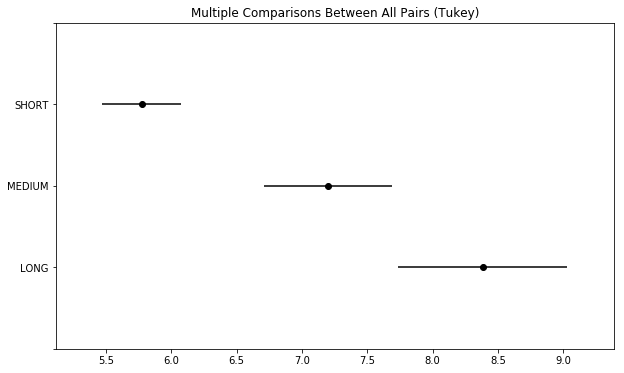

In [4]:
#EMAIL FOR JOURNEY LENGTH:  SYSTEMS

tukey_jl_s = pairwise_tukeyhsd(endog=df_jl_s['AVG_ACT'],     # Data
                          groups=df_jl_s['JOURNEY_LENGTH_GROUP'],   # Groups
                          alpha=0.05)          # Significance level

tukey_jl_s.plot_simultaneous()    # Plot group confidence intervals

tukey_jl_s.summary()              # See test summary

In [6]:
#EMAIL FOR JOURNEY LENGTH:  SYSTEMS

df_jl_s2 = """
    
    SELECT 
        JOURNEY_LENGTH_GROUP,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_jl_s
        
        GROUP BY 
            JOURNEY_LENGTH_GROUP; """

df_jl_s3 = (ps.sqldf(df_jl_s2, locals()))
df_jl_s3.head(5)

,JOURNEY_LENGTH_GROUP,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,LONG,696,6294,8.382902,0.001775
1,MEDIUM,1067,7954,7.200562,-0.008341
2,SHORT,4624,28000,5.772491,-0.015228


## Overall Latin America Average Marketing Attribution by JOURNEY STAGE in 2018 for Channel Email

In [7]:
#EMAIL VISITS AND INTERACTIONS FOR JOURNEY STAGE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_j = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			JOURNEY_STAGE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT', 'INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND PLAN='Systems'
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				JOURNEY_STAGE; """, con=cnxn)

cnxn.close()
df_j.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,JOURNEY_STAGE,ACT_CT,AVG_ATTR
0,2192969.0,INTERACTION,Systems,Email,Early,3,-0.004916
1,2192969.0,INTERACTION,Systems,Email,Middle,2,0.012883
2,2192969.0,INTERACTION,Systems,Email,Late,16,-0.005578
3,2247382.0,INTERACTION,Systems,Email,Early,3,-0.014558
4,2251178.0,INTERACTION,Systems,Email,Late,13,-0.000261


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by JOURNEY STAGE

### SYSTEMS VISITS AND INTERACTIONS

In [8]:
#EMAIL FOR JOURNEY STAGE:  SYSTEMS

df_j_sy = """
    
    SELECT 
        JOURNEY_ID,
        JOURNEY_STAGE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_j
        
        GROUP BY
            JOURNEY_ID,
            JOURNEY_STAGE; """

df_j_s = (ps.sqldf(df_j_sy, locals()))
df_j_s.head(5)

,JOURNEY_ID,JOURNEY_STAGE,TOT_ACT,AVG_ACT,ATTR
0,12732.0,Middle,2,2.0,0.012923
1,12733.0,Middle,2,2.0,-0.021179
2,50976.0,Middle,4,4.0,-0.000214
3,165419.0,Middle,5,2.5,-0.001546
4,177295.0,Early,5,5.0,0.009469


group1,group2,meandiff,lower,upper,reject
Early,Late,0.7238,0.2115,1.2361,True
Early,Middle,1.4358,0.943,1.9286,True
Late,Middle,0.712,0.2583,1.1656,True


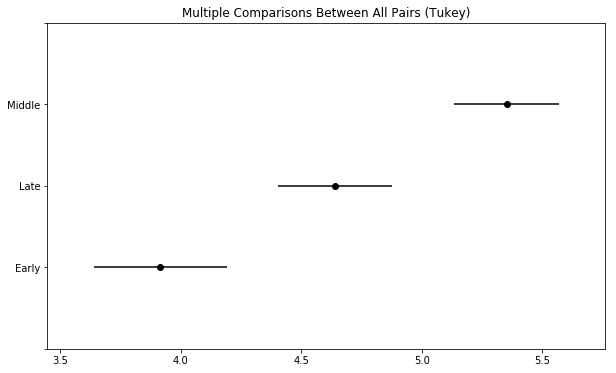

In [9]:
#EMAIL FOR JOURNEY STAGE:  SYSTEMS

tukey_j_s = pairwise_tukeyhsd(endog=df_j_s['AVG_ACT'],     # Data
                          groups=df_j_s['JOURNEY_STAGE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_j_s.plot_simultaneous()    # Plot group confidence intervals

tukey_j_s.summary()              # See test summary

In [10]:
#EMAIL FOR JOURNEY STAGE:  SYSTEMS

df_j_s2 = """
    
    SELECT 
        JOURNEY_STAGE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_j_s
        
        GROUP BY 
            JOURNEY_STAGE; """

df_j_s3 = (ps.sqldf(df_j_s2, locals()))
df_j_s3.head(5)

,JOURNEY_STAGE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Early,2173,8664,3.916475,-0.005612
1,Late,2887,14097,4.640284,-0.024372
2,Middle,3496,19487,5.352260,-0.006178


## Overall Latin America Average Marketing Attribution by CLIENT TYPE in 2018 for Channel Email

In [11]:
#EMAIL VISITS AND INTERACTIONS FOR CLIENT TYPE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_c = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			CLIENT_TYPE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT', 'INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND PLAN='Systems'
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				CLIENT_TYPE; """, con=cnxn)

cnxn.close()
df_c.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,CLIENT_TYPE,ACT_CT,AVG_ATTR
0,2265344.0,INTERACTION,Systems,Email,C,53,-0.000216
1,2407478.0,INTERACTION,Systems,Email,E,11,0.000329
2,2486959.0,INTERACTION,Systems,Email,E,12,-0.000997
3,2737224.0,INTERACTION,Systems,Email,E,1,-0.013031
4,2822435.0,INTERACTION,Systems,Email,E,42,-0.008013


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by CLIENT TYPE

### SYSTEMS VISITS AND INTERACTIONS

In [12]:
#EMAIL VISITS FOR CLIENT TYPE:  SYSTEMS

df_c_sy = """
    
    SELECT 
        JOURNEY_ID,
        CLIENT_TYPE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_c
        
        GROUP BY 
            JOURNEY_ID, 
            CLIENT_TYPE; """

df_c_s = (ps.sqldf(df_c_sy, locals()))
df_c_s.head(5)

,JOURNEY_ID,CLIENT_TYPE,TOT_ACT,AVG_ACT,ATTR
0,12732.0,C,2,2.0,0.012923
1,12733.0,C,2,2.0,-0.021179
2,50976.0,C,4,4.0,-0.000214
3,165419.0,E,5,2.5,-0.001546
4,177295.0,C,12,12.0,0.003069


group1,group2,meandiff,lower,upper,reject
C,E,-0.4236,-1.0679,0.2208,False
C,I,0.2099,-0.6265,1.0462,False
E,I,0.6335,-0.215,1.482,False


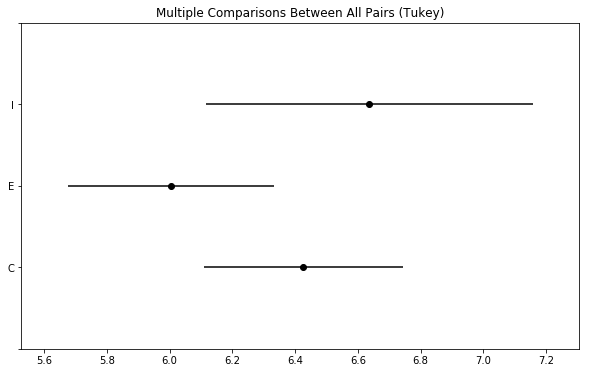

In [13]:
#EMAIL FOR CLIENT TYPE:  SYSTEMS

tukey_c_s = pairwise_tukeyhsd(endog=df_c_s['AVG_ACT'],     # Data
                          groups=df_c_s['CLIENT_TYPE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_c_s.plot_simultaneous()    # Plot group confidence intervals

tukey_c_s.summary()              # See test summary

In [14]:
#EMAIL VISITS FOR CLIENT TYPE:  SYSTEMS

df_c_s2 = """
    
    SELECT 
        CLIENT_TYPE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_c_s
        
        GROUP BY 
            CLIENT_TYPE; """

df_c_s3 = (ps.sqldf(df_c_s2, locals()))
df_c_s3.head(5)

,CLIENT_TYPE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,C,2778,18752,6.426566,-0.013227
1,E,2517,15927,6.002980,-0.013550
2,I,1092,7569,6.636447,-0.006619


## Overall Latin America Average Marketing Attribution by CLIENT FLAG in 2018 for Channel Email

In [15]:
#EMAIL VISITS AND INTERACTIONS FOR CLIENT FLAG

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_f = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			CLIENT_FLAG,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT','INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND PLAN='Systems'
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				CLIENT_FLAG; """, con=cnxn)

cnxn.close()
df_f.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,CLIENT_FLAG,ACT_CT,AVG_ATTR
0,2284957.0,INTERACTION,Systems,Email,1,15,-0.006737
1,2335740.0,INTERACTION,Systems,Email,1,16,0.004661
2,2385045.0,INTERACTION,Systems,Email,1,3,-0.062275
3,2498927.0,INTERACTION,Systems,Email,1,6,-0.007968
4,2659883.0,INTERACTION,Systems,Email,1,3,-0.075774


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by CLIENT FLAG

### SYSTEMS VISITS AND INTERACTIONS

In [16]:
#EMAIL VISITS FOR CLIENT FLAG:  SYSTEMS

df_f_sy = """
    
    SELECT 
        JOURNEY_ID,
        CLIENT_FLAG,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_f
        
        GROUP BY 
            JOURNEY_ID, 
            CLIENT_FLAG; """

df_f_s = (ps.sqldf(df_f_sy, locals()))
df_f_s.head(5)

,JOURNEY_ID,CLIENT_FLAG,TOT_ACT,AVG_ACT,ATTR
0,12732.0,0,2,2.0,0.012923
1,12733.0,1,2,2.0,-0.021179
2,50976.0,1,4,4.0,-0.000214
3,165419.0,1,5,2.5,-0.001546
4,177295.0,1,12,12.0,0.003069


In [17]:
#EMAIL FOR CLIENT FLAG:  SYSTEMS

ttest_f_v_cat1 = df_f_s[df_f_s['CLIENT_FLAG']==1]
ttest_f_v_cat2 = df_f_s[df_f_s['CLIENT_FLAG']==0]

ttest_ind(ttest_f_v_cat1['AVG_ACT'], ttest_f_v_cat2['AVG_ACT'])

Ttest_indResult(statistic=-1.7590506742651937, pvalue=0.07861679411641558)

In [18]:
#EMAIL FOR CLIENT TYPE:  SYSTEMS

df_f_s2 = """
    
    SELECT 
        CLIENT_FLAG,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_f_s
        
        GROUP BY 
            CLIENT_FLAG; """

df_f_s3 = (ps.sqldf(df_f_s2, locals()))
df_f_s3.head(5)

,CLIENT_FLAG,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,0,445,3240,7.098876,0.004392
1,1,5942,39008,6.235358,-0.013469


## Overall Latin America Average Marketing Attribution by INDUSTRY in 2018 for Channel Email

In [19]:
#EMAIL VISITS AND INTERACTIONS FOR INDUSTRY

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_i = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            PLAN,
            CHANNEL,
			INDUSTRY,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT','INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND PLAN='Systems'
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                PLAN,
				CHANNEL,
				INDUSTRY; """, con=cnxn)

cnxn.close()
df_i.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,PLAN,CHANNEL,INDUSTRY,ACT_CT,AVG_ATTR
0,1086385.0,INTERACTION,Systems,Email,Energy & Utilities,10,-0.002537
1,1738207.0,INTERACTION,Systems,Email,Telecommunications,15,0.000023
2,1777516.0,INTERACTION,Systems,Email,Chemicals & Petroleum,5,-0.004551
3,2188994.0,INTERACTION,Systems,Email,"Government, State/Provincial/Local",1,-0.118247
4,2228769.0,INTERACTION,Systems,Email,Telecommunications,2,-0.000997


### SYSTEMS VISITS AND INTERACTIONS

In [20]:
#EMAIL FOR INDUSTRY:  SYSTEMS

df_i_sy = """
    
    SELECT 
        JOURNEY_ID,
        INDUSTRY,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_i
        WHERE INDUSTRY IS NOT NULL
        
        GROUP BY 
            JOURNEY_ID, 
            INDUSTRY; """

df_i_s = (ps.sqldf(df_i_sy, locals()))
df_i_s.head(5)

,JOURNEY_ID,INDUSTRY,TOT_ACT,AVG_ACT,ATTR
0,12732.0,"Government, State/Provincial/Local",2,2.0,0.012923
1,12733.0,"Government, State/Provincial/Local",2,2.0,-0.021179
2,50976.0,Banking,4,4.0,-0.000214
3,165419.0,Banking,5,2.5,-0.001546
4,177295.0,"Government, State/Provincial/Local",12,12.0,0.003069


group1,group2,meandiff,lower,upper,reject
Aerospace & Defense,Automotive,4.6405,-7.2377,16.5187,False
Aerospace & Defense,Banking,4.2716,-7.1777,15.7208,False
Aerospace & Defense,Chemicals & Petroleum,3.4294,-8.3314,15.1903,False
Aerospace & Defense,Computer Services,4.1639,-7.4108,15.7385,False
Aerospace & Defense,Consumer Products,3.6791,-7.9478,15.306,False
Aerospace & Defense,Education,4.998,-6.6457,16.6417,False
Aerospace & Defense,Electronics,3.0345,-9.3264,15.3953,False
Aerospace & Defense,Energy & Utilities,3.4805,-8.3729,15.3339,False
Aerospace & Defense,Exclusions,5.8939,-7.1373,18.9252,False
Aerospace & Defense,Financial Markets,1.1741,-10.5975,12.9456,False


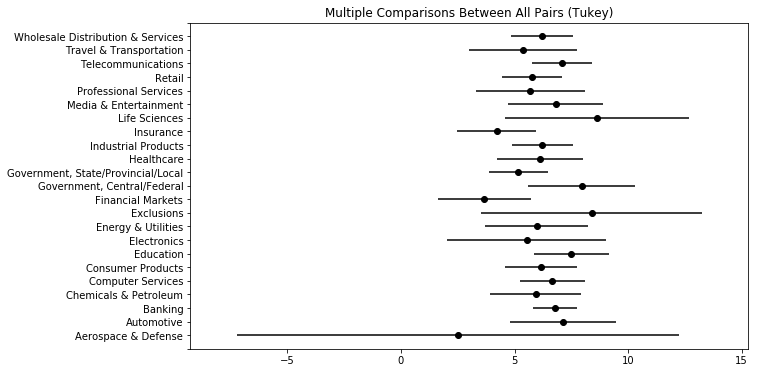

In [21]:
#EMAIL FOR INDUSTRY:  SYSTEMS

tukey_i_s = pairwise_tukeyhsd(endog=df_i_s['AVG_ACT'],     # Data
                          groups=df_i_s['INDUSTRY'],   # Groups
                          alpha=0.05)          # Significance level

tukey_i_s.plot_simultaneous()    # Plot group confidence intervals

tukey_i_s.summary()              # See test summary

In [22]:
#EMAIL FOR INDUSTRY:  SYSTEMS

df_i_s2 = """
    
    SELECT 
        INDUSTRY,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_i_s
        
        GROUP BY 
            INDUSTRY; """

df_i_s3 = (ps.sqldf(df_i_s2, locals()))
df_i_s3.head(30)

,INDUSTRY,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Aerospace & Defense,10,25,2.500000,-0.008953
1,Automotive,121,864,7.140496,-0.005219
2,Banking,1705,12088,6.771554,-0.009668
3,Chemicals & Petroleum,163,1016,5.929448,-0.010788
4,Computer Services,357,2739,6.663866,-0.014438
5,Consumer Products,268,1662,6.179104,-0.009783
6,Education,248,1949,7.497984,-0.005853
7,Electronics,58,321,5.534483,-0.018769
8,Energy & Utilities,128,802,5.980469,-0.020800
9,Exclusions,33,289,8.393939,-0.037734


## Overall Latin America Average Marketing Attribution by JOB FUNCTION in 2018 for Channel Email

In [54]:
#EMAIL VISITS FOR JOB FUNCTION

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_job_v = pd.io.sql.read_sql_query(
    """SELECT 
  		a.JOURNEY_ID, 
		c.JOB_ROLE_DSCR, 
		COUNT(DISTINCT a.ACTIVITY_DATA_KEY) AS ACT_CT, 
		AVG(a.ACTIVITY_ATTR) AS AVG_ATTR

  FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 a
  JOIN BACC_PRD_IDM_IIW.V2INAT2.V_INDIV_ON_PAGE b
	   ON a.URN_IDM_INDIV = b.URN_IDM_INDIV
  INNER JOIN BACC_PRD_IDM_IIW.V2REFR2.V_REF_JOB_ROLE c
	   ON b.JOB_ROLE_CD = c.JOB_ROLE_CD


  WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

 GROUP BY
 	a.JOURNEY_ID, 
	c.JOB_ROLE_DSCR; """, con=cnxn)

cnxn.close()
df_job_v.head(5)

,JOURNEY_ID,JOB_ROLE_DSCR,ACT_CT,AVG_ATTR
0,2947158.0,Client Service & Support - IT,1,0.002511
1,2974715.0,Teaching Professions,2,-0.001071
2,3015685.0,Systems Analysis - IT,1,0.000025
3,2964286.0,Chief Strategy Officer,1,-0.002926
4,2842325.0,Data & Content Administration - IT,1,0.000835


In [55]:
#EMAIL VISITS FOR JOB FUNCTION

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_job_i = pd.io.sql.read_sql_query(
    """SELECT 
  		a.JOURNEY_ID, 
		c.JOB_ROLE_DSCR, 
		COUNT(DISTINCT a.ACTIVITY_DATA_KEY) AS ACT_CT, 
		AVG(a.ACTIVITY_ATTR) AS AVG_ATTR

  FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 a
  JOIN BACC_PRD_IDM_IIW.V2INAT2.V_INDIV_ON_PAGE b
	   ON a.URN_IDM_INDIV = b.URN_IDM_INDIV
  INNER JOIN BACC_PRD_IDM_IIW.V2REFR2.V_REF_JOB_ROLE c
	   ON b.JOB_ROLE_CD = c.JOB_ROLE_CD


  WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

 GROUP BY
 	a.JOURNEY_ID, 
	c.JOB_ROLE_DSCR; """, con=cnxn)

cnxn.close()
df_job_i.head(5)

,JOURNEY_ID,JOB_ROLE_DSCR,ACT_CT,AVG_ATTR
0,2890060.0,Systems Analysis - IT,11,0.011304
1,3015684.0,Business Process Owner,1,0.000028
2,2882144.0,Application Project Management - IT,2,-0.021138
3,2889592.0,Professional Developer - IT,4,-0.008121
4,2098455.0,Social Media Specialist,2,-0.003207


### SYSTEMS VISITS

In [56]:
#EMAIL VISITS FOR JOB ROLE:  SYSTEMS

df_job_v_sy = """
    
    SELECT 
        JOURNEY_ID,
        JOB_ROLE_DSCR,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_job_v
        WHERE JOB_ROLE_DSCR IS NOT NULL
        
        GROUP BY 
            JOURNEY_ID, 
            JOB_ROLE_DSCR; """

df_job_v_s = (ps.sqldf(df_job_v_sy, locals()))
df_job_v_s.head(5)

,JOURNEY_ID,JOB_ROLE_DSCR,TOT_ACT,AVG_ACT,ATTR
0,735069.0,Business Operations Management,1,1.0,0.000010
1,735069.0,Management Consultancy,1,1.0,0.000011
2,1740217.0,Professional Developer - IT,1,1.0,0.148140
3,1753315.0,Administration,2,2.0,0.001074
4,1756423.0,Professional Developer - IT,1,1.0,0.000093


group1,group2,meandiff,lower,upper,reject
Administration,Application Project Management - IT,0.1667,-3.1504,3.4837,False
Administration,Business Operations Management,0.0267,-2.8396,2.8929,False
Administration,Business Process Owner,0.0667,-3.3592,3.4925,False
Administration,Chief Executive Officer - CEO,-0.3333,-5.7501,5.0834,False
Administration,Chief Information Officer - CIO,-0.3333,-5.7501,5.0834,False
Administration,Chief Marketing Officer - CMO,-0.3333,-5.7501,5.0834,False
Administration,Chief Operating Officer - COO,-0.3333,-4.6157,3.949,False
Administration,Chief Sales Officer - CSalesO,-0.1667,-3.4837,3.1504,False
Administration,Chief Security Officer - CISO,-0.3333,-4.6157,3.949,False
Administration,Chief Strategy Officer,-0.3333,-3.9162,3.2495,False


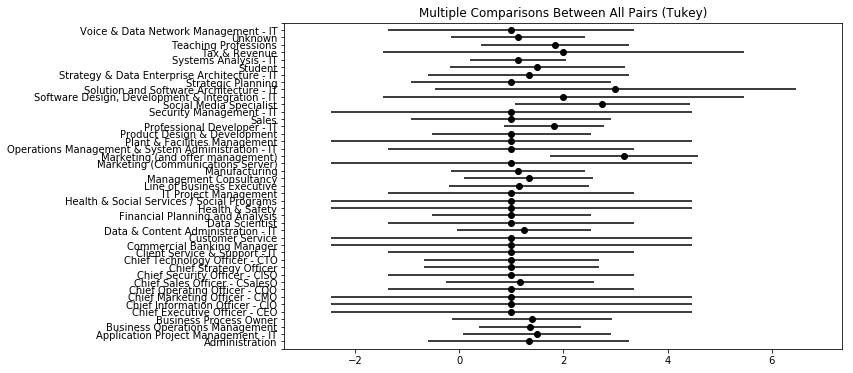

In [57]:
#EMAIL VISITS FOR JOB ROLE:  SYSTEMS

tukey_job_v_s = pairwise_tukeyhsd(endog=df_job_v_s['AVG_ACT'],     # Data
                          groups=df_job_v_s['JOB_ROLE_DSCR'],   # Groups
                          alpha=0.05)          # Significance level

tukey_job_v_s.plot_simultaneous()    # Plot group confidence intervals

tukey_job_v_s.summary()              # See test summary

In [58]:
#EMAIL VISITS FOR JOB ROLE:  SYSTEMS

df_job_v_s2 = """
    
    SELECT 
        JOB_ROLE_DSCR,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_job_v_s
        
        GROUP BY 
            JOB_ROLE_DSCR; """

df_job_v_s3 = (ps.sqldf(df_job_v_s2, locals()))
df_job_v_s3.head(50)

,JOB_ROLE_DSCR,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Administration,3,4,1.333333,-0.001786
1,Application Project Management - IT,6,9,1.500000,0.000227
2,Business Operations Management,25,34,1.360000,0.001213
3,Business Process Owner,5,7,1.400000,0.002714
4,Chief Executive Officer - CEO,1,1,1.000000,0.007077
5,Chief Information Officer - CIO,1,1,1.000000,0.002883
6,Chief Marketing Officer - CMO,1,1,1.000000,0.014094
7,Chief Operating Officer - COO,2,2,1.000000,0.000071
8,Chief Sales Officer - CSalesO,6,7,1.166667,0.002144
9,Chief Security Officer - CISO,2,2,1.000000,-0.008520


### SYSTEMS INTERACTIONS

In [59]:
#EMAIL VISITS FOR JOB ROLE:  SYSTEMS

df_job_i_sy = """
    
    SELECT 
        JOURNEY_ID,
        JOB_ROLE_DSCR,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_job_i
        WHERE JOB_ROLE_DSCR IS NOT NULL
        
        GROUP BY 
            JOURNEY_ID, 
            JOB_ROLE_DSCR; """

df_job_i_s = (ps.sqldf(df_job_i_sy, locals()))
df_job_i_s.head(5)

,JOURNEY_ID,JOB_ROLE_DSCR,TOT_ACT,AVG_ACT,ATTR
0,236198.0,Professional Developer - IT,9,9.0,0.003254
1,735069.0,Application Project Management - IT,1,1.0,0.000008
2,735069.0,Business Operations Management,31,31.0,0.000007
3,735069.0,Finance & Accounting Mgt.,4,4.0,0.000008
4,735069.0,Line of Business Executive,2,2.0,0.000008


group1,group2,meandiff,lower,upper,reject
Accounting,Administration,2.2174,-4.3101,8.7449,False
Accounting,Application Project Management - IT,1.4539,-5.4012,8.3091,False
Accounting,BI Program/Project Manager - IT,0.3452,-9.0742,9.7647,False
Accounting,Board or Director,-0.9048,-38.1519,36.3424,False
Accounting,Business Analysis / LOB Relationship Mgmt - IT,4.5952,-9.6051,18.7956,False
Accounting,Business Continuity & Recovery - IT,0.2619,-15.804,16.3278,False
Accounting,Business Operations Management,2.0186,-3.8224,7.8597,False
Accounting,Business Process Owner,1.5874,-4.9586,8.1335,False
Accounting,Capacity & Asset Management - IT,-1.9048,-28.547,24.7375,False
Accounting,Capital Manager,0.0952,-26.547,26.7375,False


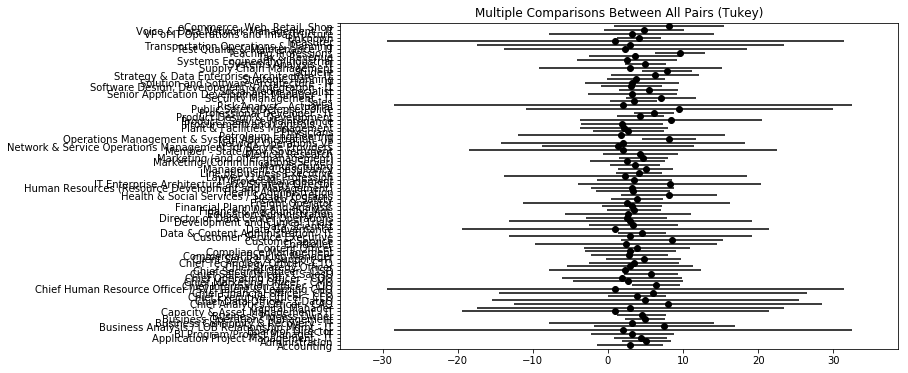

In [60]:
#EMAIL VISITS FOR JOB ROLE:  SYSTEMS

tukey_job_i_s = pairwise_tukeyhsd(endog=df_job_i_s['AVG_ACT'],     # Data
                          groups=df_job_i_s['JOB_ROLE_DSCR'],   # Groups
                          alpha=0.05)          # Significance level

tukey_job_i_s.plot_simultaneous()    # Plot group confidence intervals

tukey_job_i_s.summary()              # See test summary

In [61]:
#EMAIL VISITS FOR JOB ROLE:  SYSTEMS

df_job_i_s2 = """
    
    SELECT 
        JOB_ROLE_DSCR,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_job_i_s
        
        GROUP BY 
            JOB_ROLE_DSCR; """

df_job_i_s3 = (ps.sqldf(df_job_i_s2, locals()))
df_job_i_s3.head(100)

,JOB_ROLE_DSCR,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Accounting,42,122,2.904762,-0.006112
1,Administration,131,671,5.122137,-0.013991
2,Application Project Management - IT,92,401,4.358696,-0.007701
3,BI Program/Project Manager - IT,24,78,3.250000,-0.003712
4,Board or Director,1,2,2.000000,-0.030220
5,Business Analysis / LOB Relationship Mgmt - IT,8,60,7.500000,-0.010277
6,Business Continuity & Recovery - IT,6,19,3.166667,-0.005568
7,Business Operations Management,731,3599,4.923393,-0.011181
8,Business Process Owner,128,575,4.492188,-0.009278
9,Capacity & Asset Management - IT,2,2,1.000000,-0.000048


In [62]:
df_job_i_s3.to_csv('C:\\Users\IBM_ADMIN\Downloads\df_job_i_s3_output.csv', header=True, index=False, index_label=None)

## Overall Latin America Average Marketing Attribution by JOURNEY STAGE in 2018 for Channel Email

In [78]:
#EMAIL VISITS FOR JOURNEY STAGE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_js_v = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			JOURNEY_STAGE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Hybrid Cloud','Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				JOURNEY_STAGE; """, con=cnxn)

cnxn.close()
df_js_v.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,OPTY_BU,CHANNEL,JOURNEY_STAGE,ACT_CT,AVG_ATTR
0,2845171.0,VISIT,Systems Hardware,Email,Late,1,-0.012931
1,2916429.0,VISIT,Systems Hardware,Email,Middle,1,-0.001826
2,2974715.0,VISIT,Systems Hardware,Email,Middle,2,-0.001071
3,2908996.0,VISIT,Systems Hardware,Email,Early,1,-0.003854
4,2860934.0,VISIT,Systems Hardware,Email,Early,1,0.005206


In [79]:
#EMAIL INTERACTIONS FOR JOURNEY STAGE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_js_i = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			JOURNEY_STAGE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Hybrid Cloud','Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				JOURNEY_STAGE; """, con=cnxn)

cnxn.close()
df_js_i.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,OPTY_BU,CHANNEL,JOURNEY_STAGE,ACT_CT,AVG_ATTR
0,1890789.0,INTERACTION,Systems Hardware,Email,Early,5,-0.008792
1,1890789.0,INTERACTION,Systems Hardware,Email,Late,14,-0.005104
2,1940940.0,INTERACTION,Systems Hardware,Email,Middle,3,-0.000789
3,1940940.0,INTERACTION,Systems Hardware,Email,Late,2,-0.000789
4,2238435.0,INTERACTION,Systems Hardware,Email,Early,1,-0.001787


### SYSTEMS VISITS

In [80]:
#EMAIL VISITS FOR JOURNEY STAGE:  SYSTEMS

df_js_v_sy = """
    
    SELECT 
        JOURNEY_ID,
        JOURNEY_STAGE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_js_v
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        
        GROUP BY 
            JOURNEY_ID, 
            JOURNEY_STAGE; """

df_js_v_s = (ps.sqldf(df_js_v_sy, locals()))
df_js_v_s.head(5)

,JOURNEY_ID,JOURNEY_STAGE,TOT_ACT,AVG_ACT,ATTR
0,735069.0,Early,1,1.0,0.000010
1,735069.0,Late,1,1.0,0.000011
2,1740217.0,Late,1,1.0,0.148140
3,1753315.0,Early,1,1.0,-0.000489
4,1753315.0,Late,1,1.0,0.002638


group1,group2,meandiff,lower,upper,reject
Early,Late,0.1975,-1.316,1.711,False
Early,Middle,0.5789,-0.8683,2.0262,False
Late,Middle,0.3814,-0.8805,1.6433,False


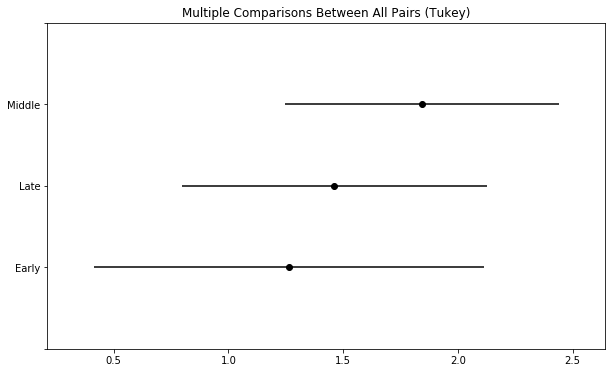

In [81]:
#EMAIL VISITS FOR JOURNEY STAGE:  SYSTEMS

tukey_js_v_s = pairwise_tukeyhsd(endog=df_js_v_s['AVG_ACT'],     # Data
                          groups=df_js_v_s['JOURNEY_STAGE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_js_v_s.plot_simultaneous()    # Plot group confidence intervals

tukey_js_v_s.summary()              # See test summary

In [85]:
#EMAIL INTERACTIONS FOR INDUSTRY:  SYSTEMS

df_js_v_s2 = """
    
    SELECT 
        JOURNEY_STAGE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_js_v_s
        
        GROUP BY 
            JOURNEY_STAGE; """

df_js_v_s3 = (ps.sqldf(df_js_v_s2, locals()))
df_js_v_s3.head(30)

,JOURNEY_STAGE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Early,57,72,1.263158,-0.005259
1,Late,89,130,1.460674,-0.003554
2,Middle,114,210,1.842105,-0.000731


### SYSTEMS INTERACTIONS

In [83]:
#EMAIL INTERACTIONS FOR JOURNEY STAGE:  SYSTEMS

df_js_i_sy = """
    
    SELECT 
        JOURNEY_ID,
        JOURNEY_STAGE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_js_i
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        
        GROUP BY 
            JOURNEY_ID, 
            JOURNEY_STAGE; """

df_js_i_s = (ps.sqldf(df_js_i_sy, locals()))
df_js_i_s.head(5)

,JOURNEY_ID,JOURNEY_STAGE,TOT_ACT,AVG_ACT,ATTR
0,236198.0,Middle,9,9.0,0.003254
1,735069.0,Early,46,46.0,0.000007
2,735069.0,Late,10,10.0,0.000026
3,735069.0,Middle,3,3.0,0.000008
4,756281.0,Late,4,4.0,-0.002295


group1,group2,meandiff,lower,upper,reject
Early,Late,1.546,0.5922,2.4997,True
Early,Middle,3.4111,2.4705,4.3518,True
Late,Middle,1.8652,0.9901,2.7402,True


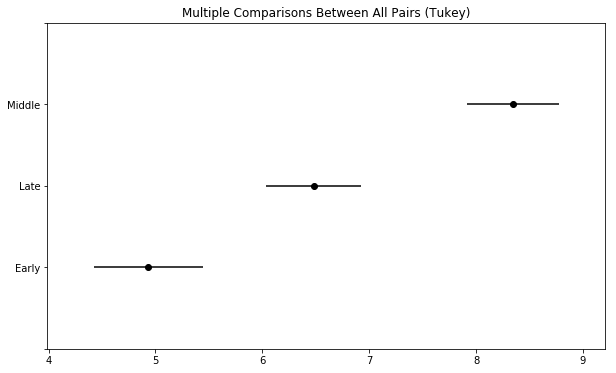

In [84]:
#EMAIL INTERACTIONS FOR JOURNEY STAGE:  SYSTEMS

tukey_js_i_s = pairwise_tukeyhsd(endog=df_js_i_s['AVG_ACT'],     # Data
                          groups=df_js_i_s['JOURNEY_STAGE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_js_i_s.plot_simultaneous()    # Plot group confidence intervals

tukey_js_i_s.summary()              # See test summary

In [86]:
#EMAIL INTERACTIONS FOR INDUSTRY:  SYSTEMS

df_js_i_s2 = """
    
    SELECT 
        JOURNEY_STAGE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_js_i_s
        
        GROUP BY 
            JOURNEY_STAGE; """

df_js_i_s3 = (ps.sqldf(df_js_i_s2, locals()))
df_js_i_s3.head(30)

,JOURNEY_STAGE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Early,1418,6996,4.933709,-0.005988
1,Late,1845,11955,6.479675,-0.028376
2,Middle,1969,16431,8.344845,-0.008054
